# Linear Regression, Multilinear Regression, Polynomial Regression

Source: web

# Part 1 - Linear Regression

$$f(x_1)=b_0+b_1 x_1 $$

known value is $y$. The residuals can be determined as
$$y-f(x_1)$$

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x = np.array([1, 7, 9, 12, 5, 10]).reshape((-1, 1))
y = np.array([2, 5, 7, 11, 15, 20])

In [4]:
print(x)

[[ 1]
 [ 7]
 [ 9]
 [12]
 [ 5]
 [10]]


In [5]:
print(y)

[ 2  5  7 11 15 20]


In [6]:
model = LinearRegression().fit(x, y) # the earlier two statements are not needed now.

In [7]:
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.25914024014778314


In [8]:
print('intercept:', model.intercept_)

intercept: 3.6465517241379306


In [9]:
print('slope:', model.coef_)

slope: [0.86637931]


In [10]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)

intercept: [3.64655172]


In [11]:
print('slope:', new_model.coef_)

slope: [[0.86637931]]


In [12]:
y_pred = model.predict(x)

In [13]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 4.51293103  9.7112069  11.44396552 14.04310345  7.97844828 12.31034483]


In [15]:
y_pred = model.intercept_ + model.coef_ * x
y_pred

array([[ 4.51293103],
       [ 9.7112069 ],
       [11.44396552],
       [14.04310345],
       [ 7.97844828],
       [12.31034483]])

In [16]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 4.51293103]
 [ 9.7112069 ]
 [11.44396552]
 [14.04310345]
 [ 7.97844828]
 [12.31034483]]


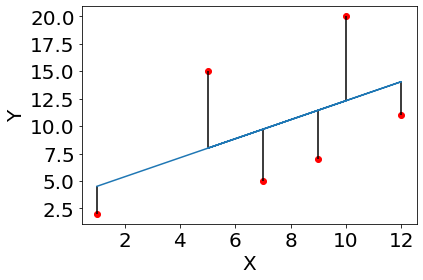

In [18]:
plt.plot(x,y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.scatter(x,y+dy)
plt.vlines(x,y,y_pred)
plt.show()

# Part 2 - Multilinear regression / Multivariate Linear regression

In [262]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [4, 2], [12, 3], [23, 4], [31, 10], [44, 14], [53, 32], [58, 31]]
y = [3, 4, 17, 12, 30, 21, 35, 41]
x, y = np.array(x), np.array(y)

In [263]:
print(x)

[[ 0  1]
 [ 4  2]
 [12  3]
 [23  4]
 [31 10]
 [44 14]
 [53 32]
 [58 31]]


In [264]:
print(y)

[ 3  4 17 12 30 21 35 41]


In [265]:
model = LinearRegression().fit(x, y)

In [266]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8543138851027825
intercept: 4.946508946586551
slope: [0.40450323 0.33417219]


In [267]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.28068114  7.23286623 10.80306423 15.58677191 20.82783087 27.42306157
 37.07869005 38.76703399]


In [268]:
#x_new = np.arange(16).reshape((-1, 2))
print(x)
print(y_pred)

[[ 0  1]
 [ 4  2]
 [12  3]
 [23  4]
 [31 10]
 [44 14]
 [53 32]
 [58 31]]
[ 5.28068114  7.23286623 10.80306423 15.58677191 20.82783087 27.42306157
 37.07869005 38.76703399]


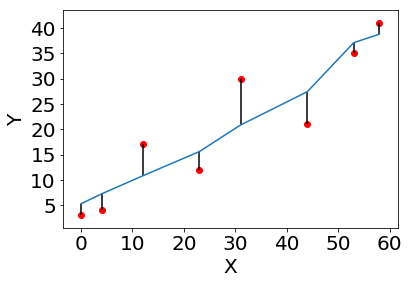

In [269]:
plt.plot(x[:,0],y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x[:,0],y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(x[:,0],y,y_pred)
plt.show()

In [270]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.28068114  6.75803197  8.23538281  9.71273364 11.19008448]


(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 9 Text yticklabel objects>)

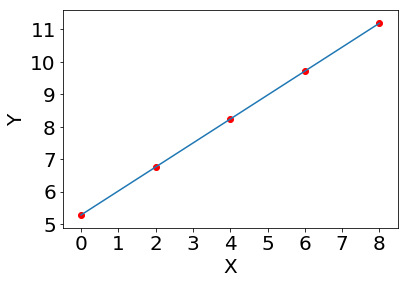

In [271]:
plt.plot(x_new[:,0],y_new)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x_new[:,0],y_new,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.vlines(x_new[:,0],y_new)
#plt.show()

# Part 3 - Polynomial Regression
For this, we need to first convert the variable x to a nonlinear form e.g. $x^2$ and and then do a linear regression against known values of y.

In [272]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [273]:
x = np.array([2, 12, 22, 33, 46, 65]).reshape((-1, 1))
y = np.array([7, 9, 10, 18, 26, 31])

In [274]:
transformer = PolynomialFeatures(degree=6, include_bias=False)

In [275]:
transformer.fit(x)

PolynomialFeatures(degree=6, include_bias=False, interaction_only=False,
                   order='C')

In [276]:
x_ = transformer.transform(x)

In [277]:
x_ = PolynomialFeatures(degree=6, include_bias=False).fit_transform(x)

In [278]:
print(x_)

[[2.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01
  3.20000000e+01 6.40000000e+01]
 [1.20000000e+01 1.44000000e+02 1.72800000e+03 2.07360000e+04
  2.48832000e+05 2.98598400e+06]
 [2.20000000e+01 4.84000000e+02 1.06480000e+04 2.34256000e+05
  5.15363200e+06 1.13379904e+08]
 [3.30000000e+01 1.08900000e+03 3.59370000e+04 1.18592100e+06
  3.91353930e+07 1.29146797e+09]
 [4.60000000e+01 2.11600000e+03 9.73360000e+04 4.47745600e+06
  2.05962976e+08 9.47429690e+09]
 [6.50000000e+01 4.22500000e+03 2.74625000e+05 1.78506250e+07
  1.16029062e+09 7.54188906e+10]]


In [279]:
model = LinearRegression().fit(x_, y)

In [280]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.9999999999999997
intercept: 6.7285070096596264
coefficients: [ 1.27449598e-02  7.85781141e-02 -9.34970646e-03  4.20655216e-04
 -7.66537437e-06  4.83196868e-08]


In [281]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 7.00000002  9.00000014 10.00000015 18.00000002 25.99999999 30.99999968]


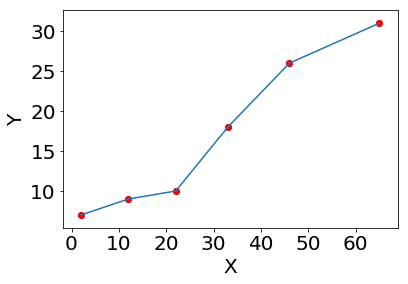

In [282]:
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.vlines(x_new[:,0],y_new)
plt.show()